In [1]:
import matplotlib.pyplot as plt  # 导入 matplotlib 库，用于图像显示
from IPython.core.pylabtools import figsize
from PIL import Image  # 导入 PIL 库，用于图像加载和处理
import torchvision.transforms as transforms  # 导入 torchvision.transforms 模块，用于图像预处理
import torch
import torch.nn as nn

In [17]:
transform = transforms.Compose([transforms.Resize((256,256)),transforms.ToTensor()])
image_path = 'Apple.jpg'
image = Image.open(image_path)
image_tensor = transform(image)
image_tensor = image_tensor + 0.9 * torch.randn_like(image_tensor)
image_tensor = torch.clamp(image_tensor,0.,1.)
print(image_tensor.shape)
print(image_tensor[0,128])

torch.Size([3, 256, 256])
tensor([1.0000, 1.0000, 0.9188, 1.0000, 0.8646, 1.0000, 0.0000, 0.6417, 1.0000,
        1.0000, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.1390, 0.3891, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9642, 1.0000, 0.0000, 1.0000,
        0.0000, 0.8056, 0.3644, 1.0000, 1.0000, 0.4513, 0.8361, 0.7423, 1.0000,
        0.3815, 0.0000, 0.1067, 0.8306, 0.7553, 0.0000, 1.0000, 0.9822, 0.4018,
        1.0000, 0.6370, 0.0000, 0.1335, 0.5815, 0.0000, 1.0000, 0.7586, 0.4336,
        1.0000, 1.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0611, 0.8162, 0.1043,
        1.0000, 1.0000, 1.0000, 0.5743, 0.4929, 0.5330, 1.0000, 0.6083, 0.9339,
        0.0000, 0.0000, 1.0000, 0.1995, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000,
        0.5816, 1.0000, 0.2182, 1.0000, 0.3410, 0.0000, 0.8064, 0.3496, 0.5182,
        1.0000, 0.0000, 0.0000, 0.0000, 0.6106, 1.0000, 0.0616, 1.0000, 0.0000,
        0.4635, 0.0000, 0.5268, 0.6219, 0.0000, 0.5921, 0.4164, 0.8827, 0.0000,
        0.1954

In [18]:
origin_image_numpy = image_tensor.numpy().transpose((1, 2, 0))
print(origin_image_numpy.shape)

(256, 256, 3)


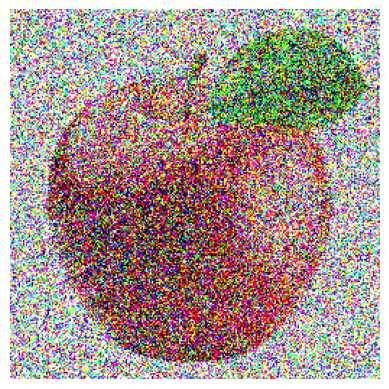

In [19]:
plt.imshow(origin_image_numpy)
plt.axis('off')
plt.show()

In [9]:
# 创建神经网络模型
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(16,8,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.decoder = nn.Sequential(
            # HO = (Hin - 1) .s -2p +k + op
            nn.ConvTranspose2d(8,16,kernel_size=3,stride=2,padding=1,output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16,3,kernel_size=3,stride=2,padding=1,output_padding=1),
            nn.Sigmoid() # 输出转化为0到1范围
        )
    def forward(self, x):
        x = self.encoder(x)
        # print(f"encode shape:{x.shape}")
        x = self.decoder(x)
        # print(f"decode shape:{x.shape}")
        return x
model = AutoEncoder()
x = model(torch.rand((3,256,256)))

In [10]:
# 训练数据
import torch.optim as optim

In [11]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=1e-3)
epochs = 500
for epoch in range(epochs):
    output = model(image_tensor)
    loss = loss_fn(output, image_tensor)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch+1) % 10 == 0:
        print(f"epoch:{epoch+1}/{epochs},loss:{loss.item()}")


epoch:10/500,loss:0.15128743648529053
epoch:20/500,loss:0.14226186275482178
epoch:30/500,loss:0.1374167799949646
epoch:40/500,loss:0.13287581503391266
epoch:50/500,loss:0.12647177278995514
epoch:60/500,loss:0.11932897567749023
epoch:70/500,loss:0.11482622474431992
epoch:80/500,loss:0.1106092557311058
epoch:90/500,loss:0.10615545511245728
epoch:100/500,loss:0.10298863053321838
epoch:110/500,loss:0.10117610543966293
epoch:120/500,loss:0.09999212622642517
epoch:130/500,loss:0.09915285557508469
epoch:140/500,loss:0.09854788333177567
epoch:150/500,loss:0.09805526584386826
epoch:160/500,loss:0.0976274386048317
epoch:170/500,loss:0.09724175184965134
epoch:180/500,loss:0.09687822312116623
epoch:190/500,loss:0.0965496376156807
epoch:200/500,loss:0.09613830596208572
epoch:210/500,loss:0.0956885889172554
epoch:220/500,loss:0.09516573697328568
epoch:230/500,loss:0.09459380060434341
epoch:240/500,loss:0.09405220299959183
epoch:250/500,loss:0.0936049148440361
epoch:260/500,loss:0.09324920177459717
e

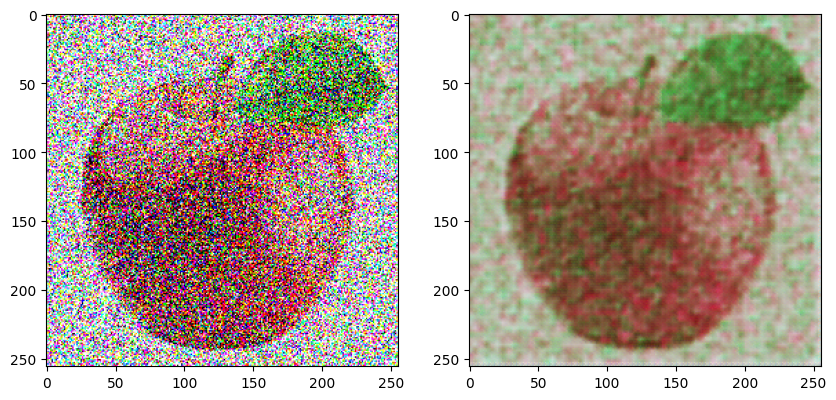

In [20]:
# 重构图像（推理）
with torch.no_grad():
    output = model(image_tensor)
image_numpy = output.numpy().transpose((1, 2, 0))
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[1].imshow(image_numpy)
ax[0].imshow(origin_image_numpy)
plt.show()
